# Lecture 11: Numpy 

__Reading Material:__
[Numpy tutorial](http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/intro/numpy/operations.html)
- generate and manipulate arrays with NumPy
- create basic plots with matplotlib.



In [43]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

A reasonably Pythonic way of plotting the $\sin$ function without using NumPy explicity...

In [44]:
n_points = 100

delta = 4*math.pi/(n_points-1)
x = [delta*i for i in range(n_points)]
y = [math.sin(x_i) for x_i in x]
plt.plot(x, y,'-ro')

Error in callback <function post_execute at 0x11feacf50> (for post_execute):


OSError: [Errno 2] No such file or directory: 'latex'

OSError: [Errno 2] No such file or directory: 'latex'

<Figure size 432x288 with 1 Axes>

Generating the x-points using NumPy...

In [48]:
x = np.linspace(0,1,5,endpoint=False)
x = np.linspace(0,1,5,endpoint=True) # np.linspace(start point, end point, number of number wanted) Here wants 5 number\
                                    # between 0 and 1, including 1
x = np.linspace(0,1,5) #default argument of endpoint is True
print x

[0.   0.25 0.5  0.75 1.  ]


In [40]:
x = np.linspace(0, 4*np.pi, n_points)
# print x 
type(x)

numpy.ndarray

Totally missing the point of NumPy arrays:

In [ ]:
y = np.zeros(len(x))
for i, x_i in enumerate(x):
    y[i] = np.sin(x_i)
plt.plot(x,y)

The correct approach:

In [ ]:
y = np.sin(x)
plt.plot(x, y)

In [50]:
x = np.array([1,2,3])
print type(x)
print x

y = np.sin(x)
print y


<type 'numpy.ndarray'>
[1 2 3]
[0.84147098 0.90929743 0.14112001]


I cannot think of a situation for which iterating over a NumPy array is the right thing to do. If you ever think you need to do this, think again. 

Get comfortable _vectorizing_ your scientific computing code: perform operations on entire arrays compactly using NumPy.

Text(0.5,1,'y(x) = sin(x)')

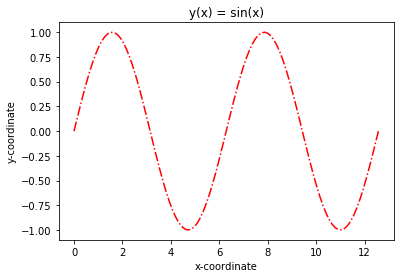

In [7]:
plt.plot(x, y, 'r-.')
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("y(x) = sin(x)")

Fancy use of `matplotlib` is not important for the class; I just wanted to show you what you _can_ do. I don't memorize this stuff; I look up what I want to do when I need it.

In [8]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 16)
plt.plot(x, y, x, np.cos(x))
plt.xlabel("$x$-coordinate") # supports LaTeX, if you know it
plt.ylabel("$y$-coordinate")
plt.title("$y(x) = f(x)$")
plt.legend(("$f(x) = \sin(x)$", "$f(x) = \cos(x)$"), bbox_to_anchor = (1,1))

Error in callback <function post_execute at 0x11feacf50> (for post_execute):


OSError: [Errno 2] No such file or directory: 'latex'

OSError: [Errno 2] No such file or directory: 'latex'

<Figure size 432x288 with 1 Axes>

In [52]:
x = np.arange(24)
print x
print x.shape
print x.ndim

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
(24,)
1


In [53]:
x = np.arange(24)
print x.shape
print x
y = x.reshape((24,1))
print y.shape
print y

(24,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
(24, 1)
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]]


In [54]:
x = np.arange(24)
y = x.reshape((4,6)) # 4 rows, 6 columns
print y
print y.shape
print y.ndim

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
(4, 6)
2


In [55]:
z = x.reshape((2,3,-1)) # 2 pages, 3 rows, '-1' means as many columns as needed to preserve the number of elements
print z

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


General rule: when specifying the shape of an array, columns is always last. Rows is second to last. "Pages" is third to last. And so on.

Caution: for efficiency, many NumPy operations avoid copying data. They just give you different __views__ of the underlying data.

In [56]:
x[11] = 999
print x
print y
print z

[  0   1   2   3   4   5   6   7   8   9  10 999  12  13  14  15  16  17
  18  19  20  21  22  23]
[[  0   1   2   3   4   5]
 [  6   7   8   9  10 999]
 [ 12  13  14  15  16  17]
 [ 18  19  20  21  22  23]]
[[[  0   1   2   3]
  [  4   5   6   7]
  [  8   9  10 999]]

 [[ 12  13  14  15]
  [ 16  17  18  19]
  [ 20  21  22  23]]]


<h3>Multidimensional Indexing:</h3> <br>
As with shapes, the column index goes last, the row index goes second to last, the "page" goes third to last, etc...

In [57]:
z[1,2,0]


20

<h3>Slicing:</h3> <br>
Slicing works the same way as it did with lists.

In [58]:
y = x[1:8:2] # slicing [start pt: end pt: increment]
print x
print y

[  0   1   2   3   4   5   6   7   8   9  10 999  12  13  14  15  16  17
  18  19  20  21  22  23]
[1 3 5 7]


Except that it creates a _view_. It does not copy the data.

In [70]:
l = [1,2,3,4]
yl = l[1:3]
print type(yl)
print type(l)
yl[0]=0
y[:] = 0
print type(y)
print yl
print y,l
print x

<type 'list'>
<type 'list'>
<type 'numpy.ndarray'>
[0, 3]
[0 0 0 0] [1, 2, 3, 4]
[0 1 2 3 4 5 6 7 8 9]


In [71]:
x = np.arange(10)
#y = x[1:5] #this is a view
y = x[1:5].copy() #this is a copy
y[:] =0
print x
print y

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0]


You need to be explicit if you really need to copy data; you use the `copy` method. But try to avoid it.

<h3>Fancy Indexing:</h3> <br>
Boolean masks are a really powerful tool for manipulating arrays.

In [19]:
# fancy indexing creates a copy
x = np.arange(5)
y = x[[0,2]] #fetch index 0 and 2, you are getting a new copy
y[0] = 3
print x
print y

[0 1 2 3 4]
[3 2]


In [21]:
# slicing creates a view
x = np.arange(5)
y = x[0:2]
y[0] = 3
print x
print y

[3 1 2 3 4]
[3 1]


In [24]:
x = np.arange(10)
mask = x <= 6
print mask
print x[mask] 

[ True  True  True  True  True  True  True False False False]
[0 1 2 3 4 5 6]


In [25]:
print x[x<=6]
print x[x%2==0]

[0 1 2 3 4 5 6]
[0 2 4 6 8]


Unfortunately, we can't chain logical operators as we can with built-in data types. You have to explicitly use NumPy's versions of the boolean operators.

In [ ]:
mask1 = x <= 6
mask2 = x >= 3
mask3 = np.logical_and(mask1, mask2)
print mask1
print mask2
print mask3

In [ ]:
mask4 = np.logical_xor(mask1, mask2) # we learned xor the other day
print mask4

Boolean masks create a _copy_ of the data.

In [ ]:
y = x[mask]
print x
print y
y[:] = 0
print x
print y

Another form of fancy indexing is using index arrays. I don't use this quite as often, but it can come in handy.

In [ ]:
x = np.arange(24).reshape((4,-1))
print x
y = np.arange(x.shape[1])
print y

In [ ]:
i = np.random.permutation(y)
print i
print x[:,i]

<h3>Broadcasting:</h3> <br>
A fancy name for the rules when applying operations to shapes of different shapes.

Typically, operations are performed element by element.

In [ ]:
x = np.arange(10)
print x * x

But when we have arrays of different sizes...

In [ ]:
y = x.reshape((1,-1))
print y

In [ ]:
z = x.reshape((-1,1))
print z

print y.shape
print z.shape

In [ ]:
print y+z

The operation can be performed on every combination of elements from the two arrays.
Not essential for this class, but can be really handy in writing compact code for scientific computing.

## Imshow( ) and RGB color channels
Instead of using a single real number per pixel, for which we then need to find a colormap, we can also specify the color explicitly, using three channels (red, green and blue). If an array is n × m × 3, then imshow() interprets this as an image with RGB colors. The strength of each of the three colors is specified in the range [0,1]. For example, this is how we specify a 2 × 3 image, with colors red, green, blue, and purple, white, black:

In [ ]:
image=[[[1.0,0.0,0.0],[0.0,1,0.0],[0.0,0.0,1.0]],
       [[1.0,0.0,1.0],[1.0,1.0,1.0],[0.0,0.0,0.0]]]
plt.imshow(image)
plt.show()

We may also import image files, which are translated to arrays of this form, using the __matplotlib.image__ module.

In [ ]:
import matplotlib.image as mpimg 
img=mpimg.imread('kitty-cat.jpg') 
plt.imshow(img)
plt.show()

In [ ]:
print type(img)
print img.ndim
print img.shape
print img.dtype